**DATASET: LOAN DATASET**

To read more about the dataset or download, check the link [DATA](https://www.kaggle.com/datasets/itssuru/loan-data)

The aim of this Notebook is to carry out a type of ensemble learning knownn as blending. We will use KNeighborsClassifier and DecisionTreeClassifier as the Base learners, and Logistic Regression model as the Meta learner.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [ ]:
loan_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Purpose of Taking Loan**

In [ ]:
loan_data.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

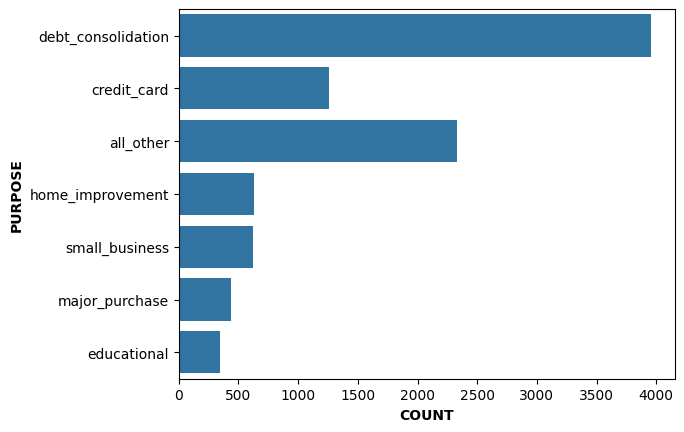

In [ ]:
ax = sns.countplot(data = loan_data, y ="purpose")
ax.set_xlabel('COUNT', fontdict={'weight':'bold'})
ax.set_ylabel('PURPOSE', fontdict={'weight':'bold'})
plt.show()

**What is the distribution of the interest rate? Normal?**

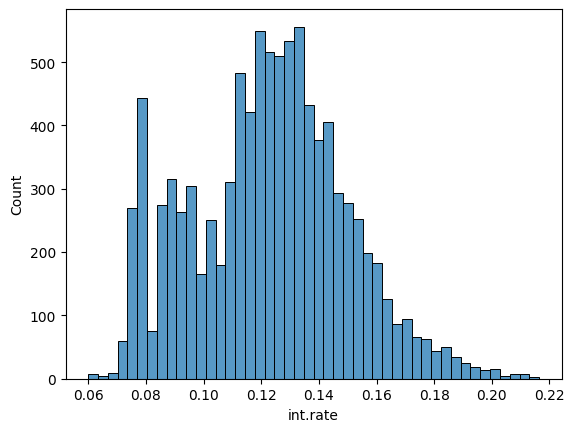

In [ ]:
ax = sns.histplot(loan_data, x="int.rate")

Not a percent bell-curve.
Distribution is clustered around 0.11 and 0.14

**Distribution of Installment Payment**

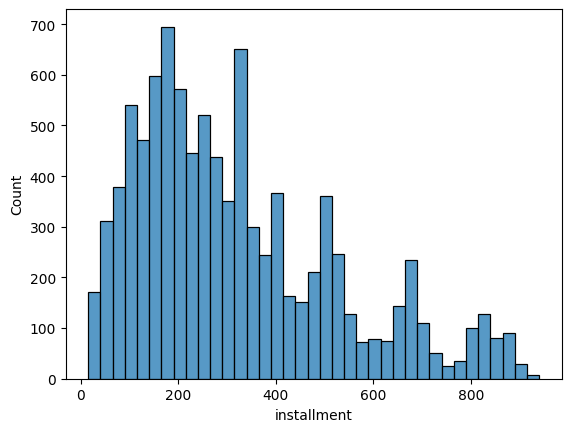

In [ ]:
ax = sns.histplot(loan_data, x="installment")

Our data is right skewed and data us clustered around 60 and 360 approximately

In [ ]:
loan_data.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


**Ratio of Clients that Meets the Credit Underwriting Criteria**

We will find this using the credit policy feature. 1 represents those that meet the criteria and 0 otherwise

In [ ]:
loan_data["credit.policy"].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

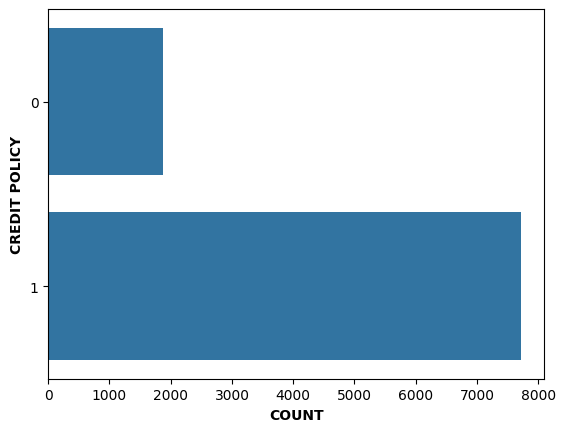

In [ ]:
ax = sns.countplot(loan_data, y = "credit.policy")
ax.set_xlabel('COUNT', fontdict={'weight':'bold'})
ax.set_ylabel('CREDIT POLICY', fontdict={'weight':'bold'})
plt.show()

Majority do meet the criteria

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


No missing values

**What Does our Label Look Like?**

0    8045
1    1533
Name: not.fully.paid, dtype: int64


<Axes: >

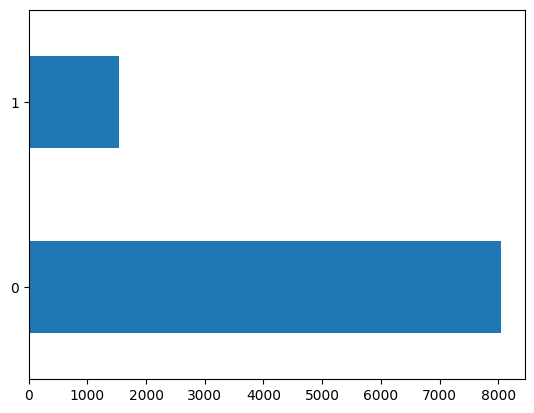

In [ ]:
print(loan_data['not.fully.paid'].value_counts())
loan_data['not.fully.paid'].value_counts().plot(kind='barh')

We have a problem of imbalance. To balance the label, we will undersample the majority class(0)- fully paid

In [ ]:
loan_data_class_1 = loan_data[loan_data['not.fully.paid'] == 1]
number_class_1 = len(loan_data_class_1)
loan_data_class_0 = loan_data[loan_data['not.fully.paid'] == 0].sample(number_class_1)

final_loan_data = pd.concat([loan_data_class_1,
                         	loan_data_class_0])

print(final_loan_data.shape)

(3066, 14)


In [ ]:
final_loan_data.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1


**Data Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Remove unwanted 'purpose' column and get the data
final_loan_data.drop('purpose', axis=1, inplace=True)
X = final_loan_data.drop('not.fully.paid', axis=1)

normalized_X = scaler.fit_transform(X)

**MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split

y = final_loan_data['not.fully.paid']
r_state = 2023
t_size = 0.33

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y,
                                                	test_size=t_size,
                                                	random_state=r_state,
                                                	stratify=y)

In [ ]:
print('length of training data after subsetting validation', len(X_train))
print('length of testing data', len(X_test))

length of training data after subsetting validation 2054
length of testing data 1012


create validation-set from the training set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
                                            	X_train, y_train,
                                            	test_size=t_size,
                                            	random_state=r_state)

In [ ]:
print('length of training data after subsetting validation', len(X_train))
print('length of validation data', len(X_val))

length of training data after subsetting validation 1376
length of validation data 678


In [ ]:
# Initiate and fit a Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# predict on test and validation data
dt_model_pred_val = dt_model.predict(X_val)
dt_model_pred_test= dt_model.predict(X_test)

#convert predicted values into a dataframe
dt_model_pred_val = pd.DataFrame(dt_model_pred_val)
dt_model_pred_test = pd.DataFrame(dt_model_pred_test)


In [ ]:
print('shape of dt_model_pred_val:',dt_model_pred_val.shape)
print('shape of dt_model_pred_test:',dt_model_pred_test.shape)

shape of dt_model_pred_val: (678, 1)
shape of dt_model_pred_test: (1012, 1)


In [ ]:

# Initiate and fit a KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# predict on test and validation data
knn_model_pred_val = knn_model.predict(X_val)
knn_model_pred_test = knn_model.predict(X_test)

# convert predicted values into a dataframe
knn_model_pred_val = pd.DataFrame(knn_model_pred_val)
knn_model_pred_test = pd.DataFrame(knn_model_pred_test)

In [ ]:
print('shape of dt_model_pred_val:', knn_model_pred_val.shape)
print('shape of dt_model_pred_test:',knn_model_pred_test.shape)

shape of dt_model_pred_val: (678, 1)
shape of dt_model_pred_test: (1012, 1)


We will merge the original validation data with the predicted values from both KNN and DTC. We will do the same with the test data

In [ ]:
# convert original validation and test data into dataframe
x_val = pd.DataFrame(X_val)
x_test = pd.DataFrame(X_test)

# merge validation data
df_val_lr = pd.concat([x_val, knn_model_pred_val,
                    	dt_model_pred_val], axis=1)

# merge testing data
df_test_lr = pd.concat([x_test, dt_model_pred_test,
                     	knn_model_pred_test],axis=1)


In [ ]:
print('df_val_lr shape:', df_val_lr.shape)
print('df_test_lr shape:', df_test_lr.shape)

df_val_lr shape: (678, 14)
df_test_lr shape: (1012, 14)


In [ ]:
df_val_lr.head()

,0,1,2,3,4,5,6,7,8,9,10,11,0,0
0,0.0,0.386885,0.091265,0.365849,0.364152,0.243902,0.033743,0.003498,0.359624,0.090909,0.000000,0.0,0,1
1,1.0,0.415738,0.418746,0.550718,0.612483,0.390244,0.235813,0.009944,0.435681,0.000000,0.076923,0.0,0,1
2,1.0,0.345574,0.322689,0.511397,0.626836,0.390244,0.132905,0.017526,0.738967,0.000000,0.000000,0.0,1,0
3,0.0,0.304262,0.046806,0.624770,0.608812,0.341463,0.636209,0.066666,0.518310,0.030303,0.000000,0.0,1,1
4,0.0,0.424918,0.656098,0.624744,0.608812,0.585366,0.460338,0.096575,0.841315,0.060606,0.000000,0.0,1,1


In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression()

lr_model.fit(df_val_lr,y_val)
lr_model.score(df_test_lr,y_test)

0.6086956521739131

**Build classification_report and Confusion matrix**

In [ ]:
y_pred_log = lr_model.predict(df_test_lr)

print('confusion matrix: \n', confusion_matrix(y_test, y_pred_log))

print('classification report: \n', classification_report(y_test, y_pred_log))

confusion matrix: 
 [[286 220]
 [176 330]]
classification report: 
               precision    recall  f1-score   support

           0       0.62      0.57      0.59       506
           1       0.60      0.65      0.63       506

    accuracy                           0.61      1012
   macro avg       0.61      0.61      0.61      1012
weighted avg       0.61      0.61      0.61      1012



<Axes: >

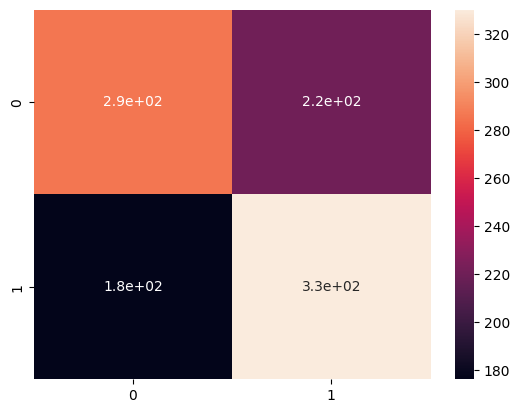

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_log), annot=True)

In [ ]:
f = open('BlendingEnsembleModel.pkl','wb')
pickle.dump(lr_model, f)

Welcome to the End